In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [28]:
fullData = pd.read_csv('califforniaHouse.csv',encoding='UTF-8')

In [29]:
fullData

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20276  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20277  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20278  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20279  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20280  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0        -122.23        4.526  
1        -122.22        3.585  
2        -122.24        3.521  
3        -122.25        3.413  
4        -122.25        3.422  
...          ...          ...  
20276    -121.09        0.781  
20277    -121.21        0.771  
20278    -121.22        0.923  
20279    -121.32        0.847  
20280    -121.24        0.894  

[20281 rows x 9 columns]

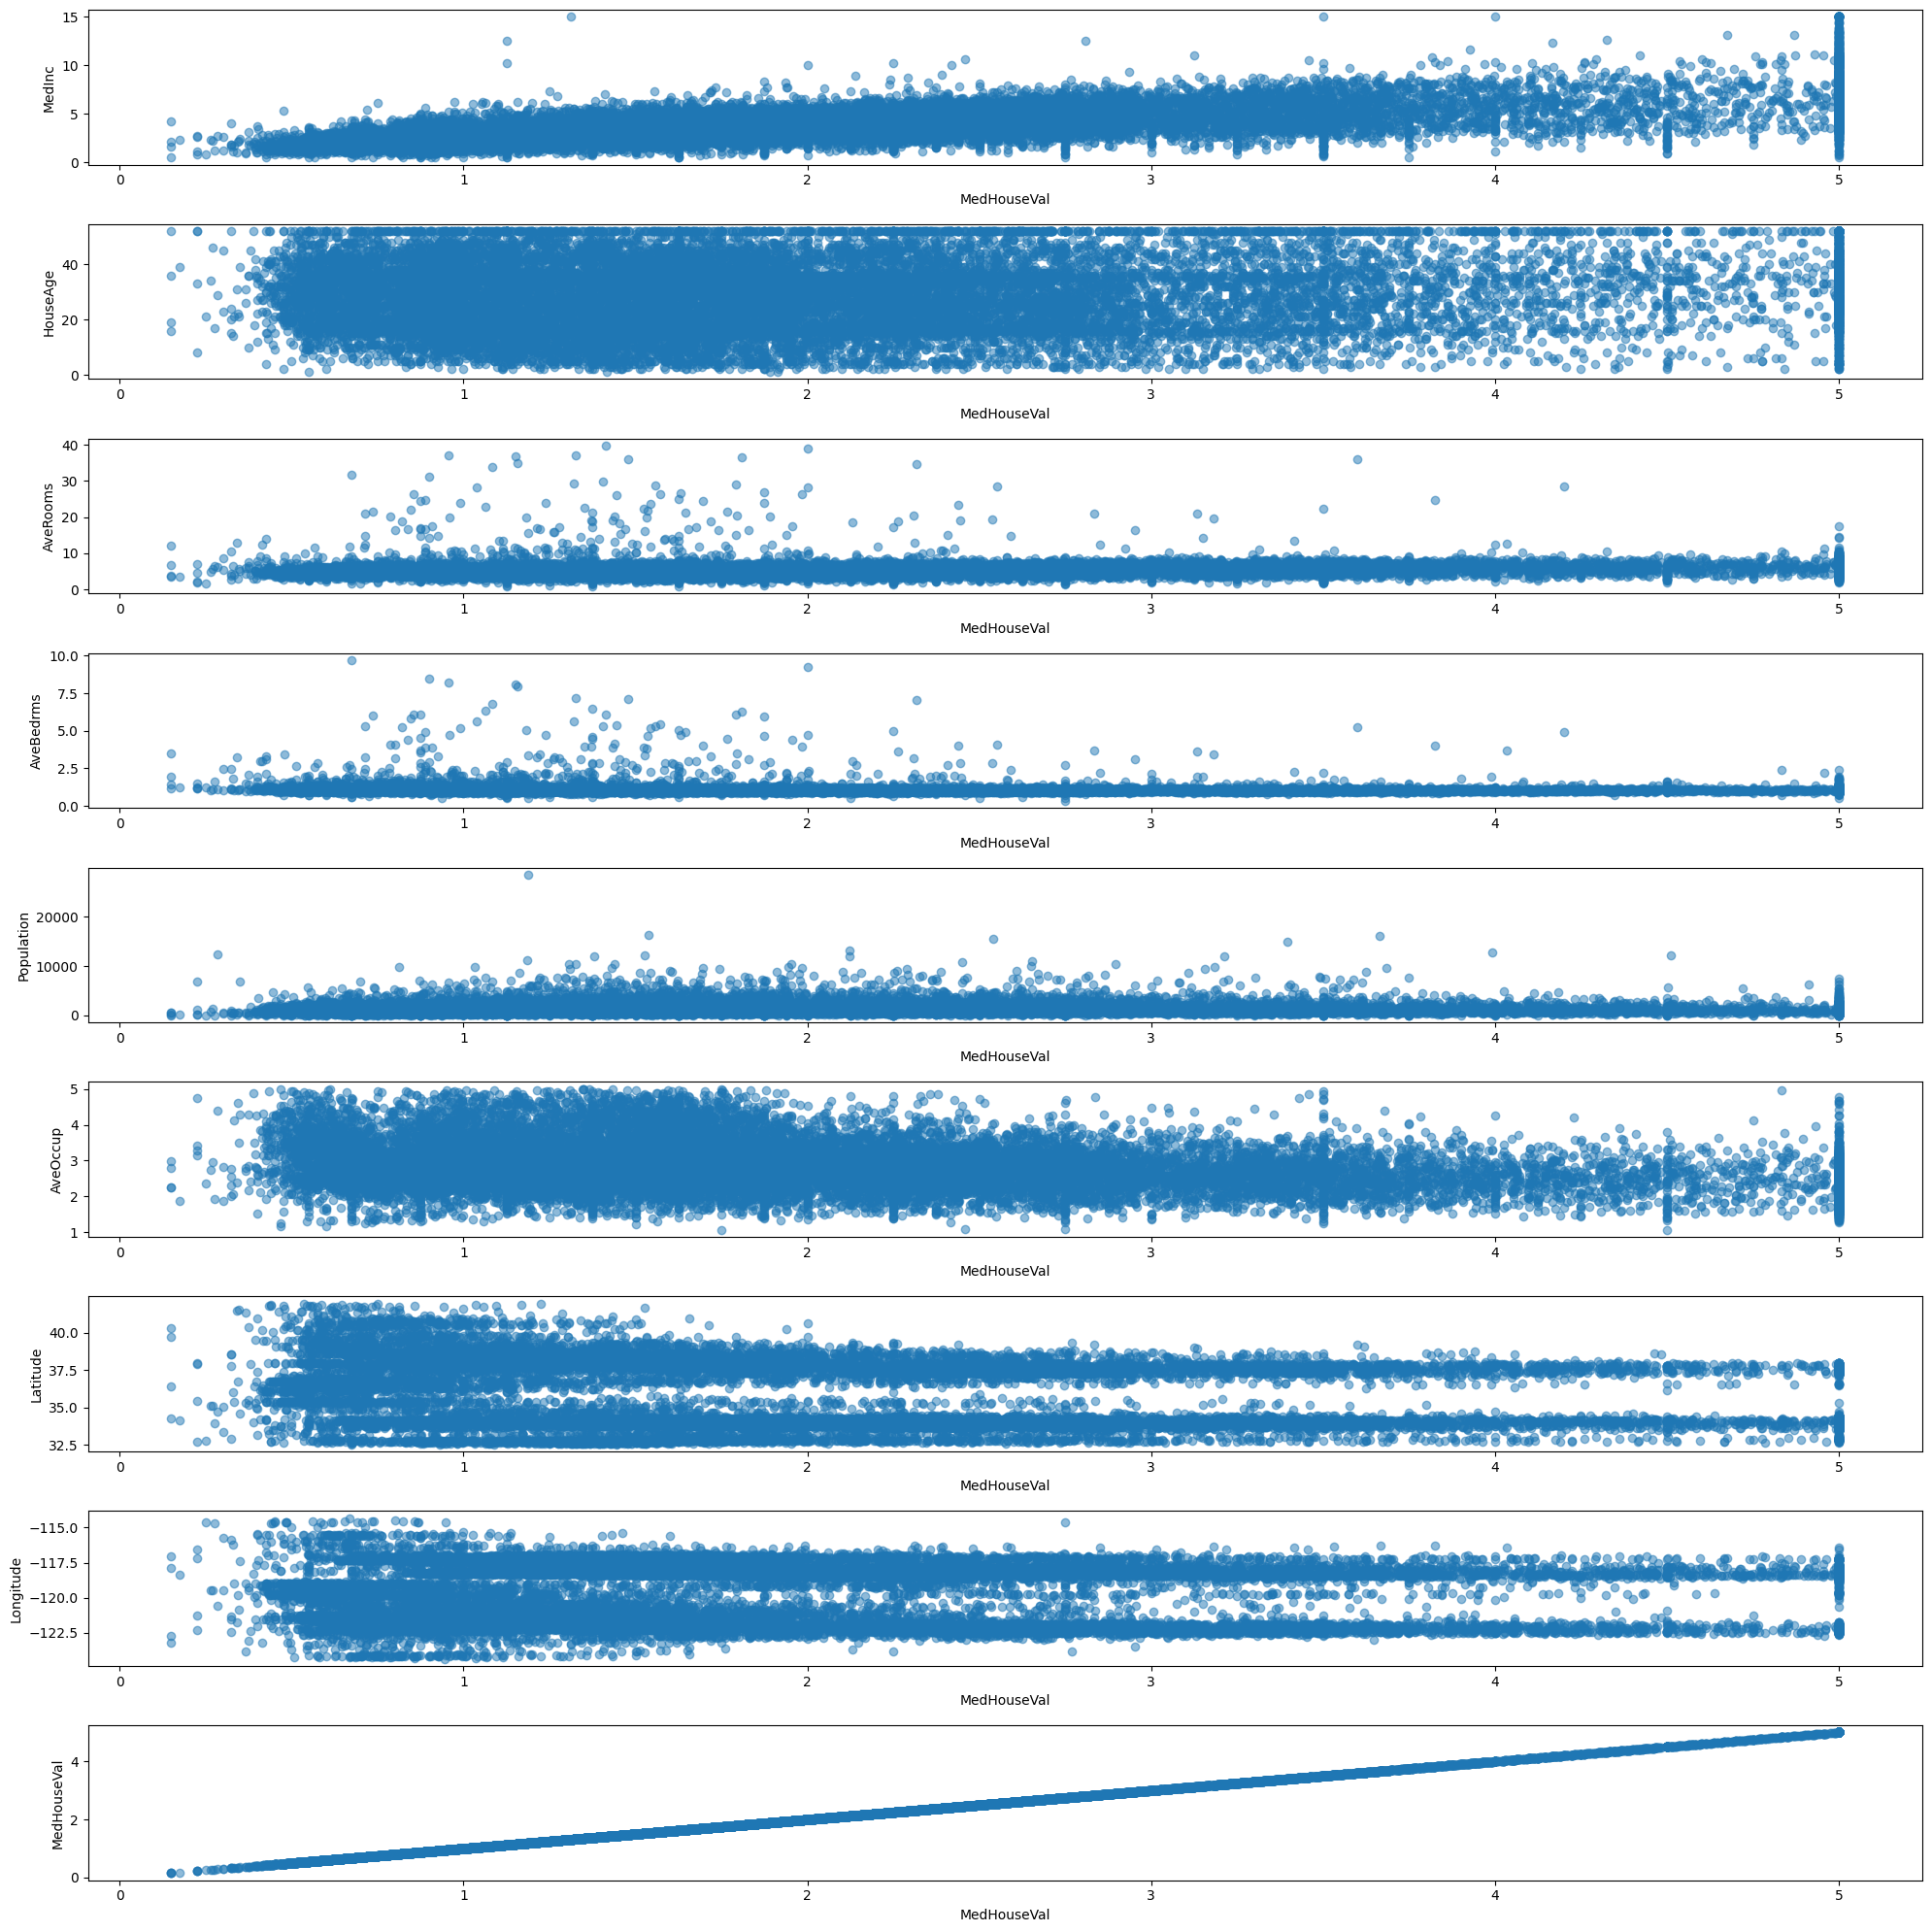

In [30]:
fig,axis = plt.subplots(9,1,figsize=(20,20))

for i in range(fullData.shape[1]):

            # Gráfico de dispersão para variáveis fora da diagonal
            axis[i].scatter(fullData.iloc[:, -1], fullData.iloc[:, i], alpha=0.5)
            axis[i].set_xlabel(fullData.columns[-1])
            axis[i].set_ylabel(fullData.columns[i])

# Ajustar o layout para que os subgráficos não se sobreponham
plt.tight_layout()
plt.show()

# Para a análise, os dados estão muito juntos, podemos pegar uma amostra da população

In [31]:
np.random.seed(2)

amostra = fullData.sample(frac=.4)

In [32]:
amostra.shape

(8112, 9)

In [33]:
amostra.describe()

MedInc     HouseAge     AveRooms    AveBedrms    Population  \
count  8112.000000  8112.000000  8112.000000  8112.000000   8112.000000   
mean      3.904038    28.516149     5.408274     1.087557   1423.221277   
std       1.919812    12.644977     1.814999     0.300596   1084.268910   
min       0.499900     1.000000     1.130435     0.500000      8.000000   
25%       2.578850    18.000000     4.462069     1.005051    788.000000   
50%       3.562500    29.000000     5.244478     1.048309   1166.000000   
75%       4.781500    37.000000     6.064433     1.098742   1735.000000   
max      15.000100    52.000000    38.840909     9.272727  15507.000000   

          AveOccup     Latitude    Longitude  MedHouseVal  
count  8112.000000  8112.000000  8112.000000  8112.000000  
mean      2.883219    35.644708  -119.587527     2.077199  
std       0.663708     2.142882     2.015780     1.148645  
min       1.066176    32.550000  -124.270000     0.149990  
25%       2.440407    33.930000  -121.830000     1.219000  
50%       2.816079    34.270000  -118.540000     1.817500  
75%       3.263316    37.720000  -117.990000     2.647000  
max       5.000000    41.880000  -114.470000     5.000010

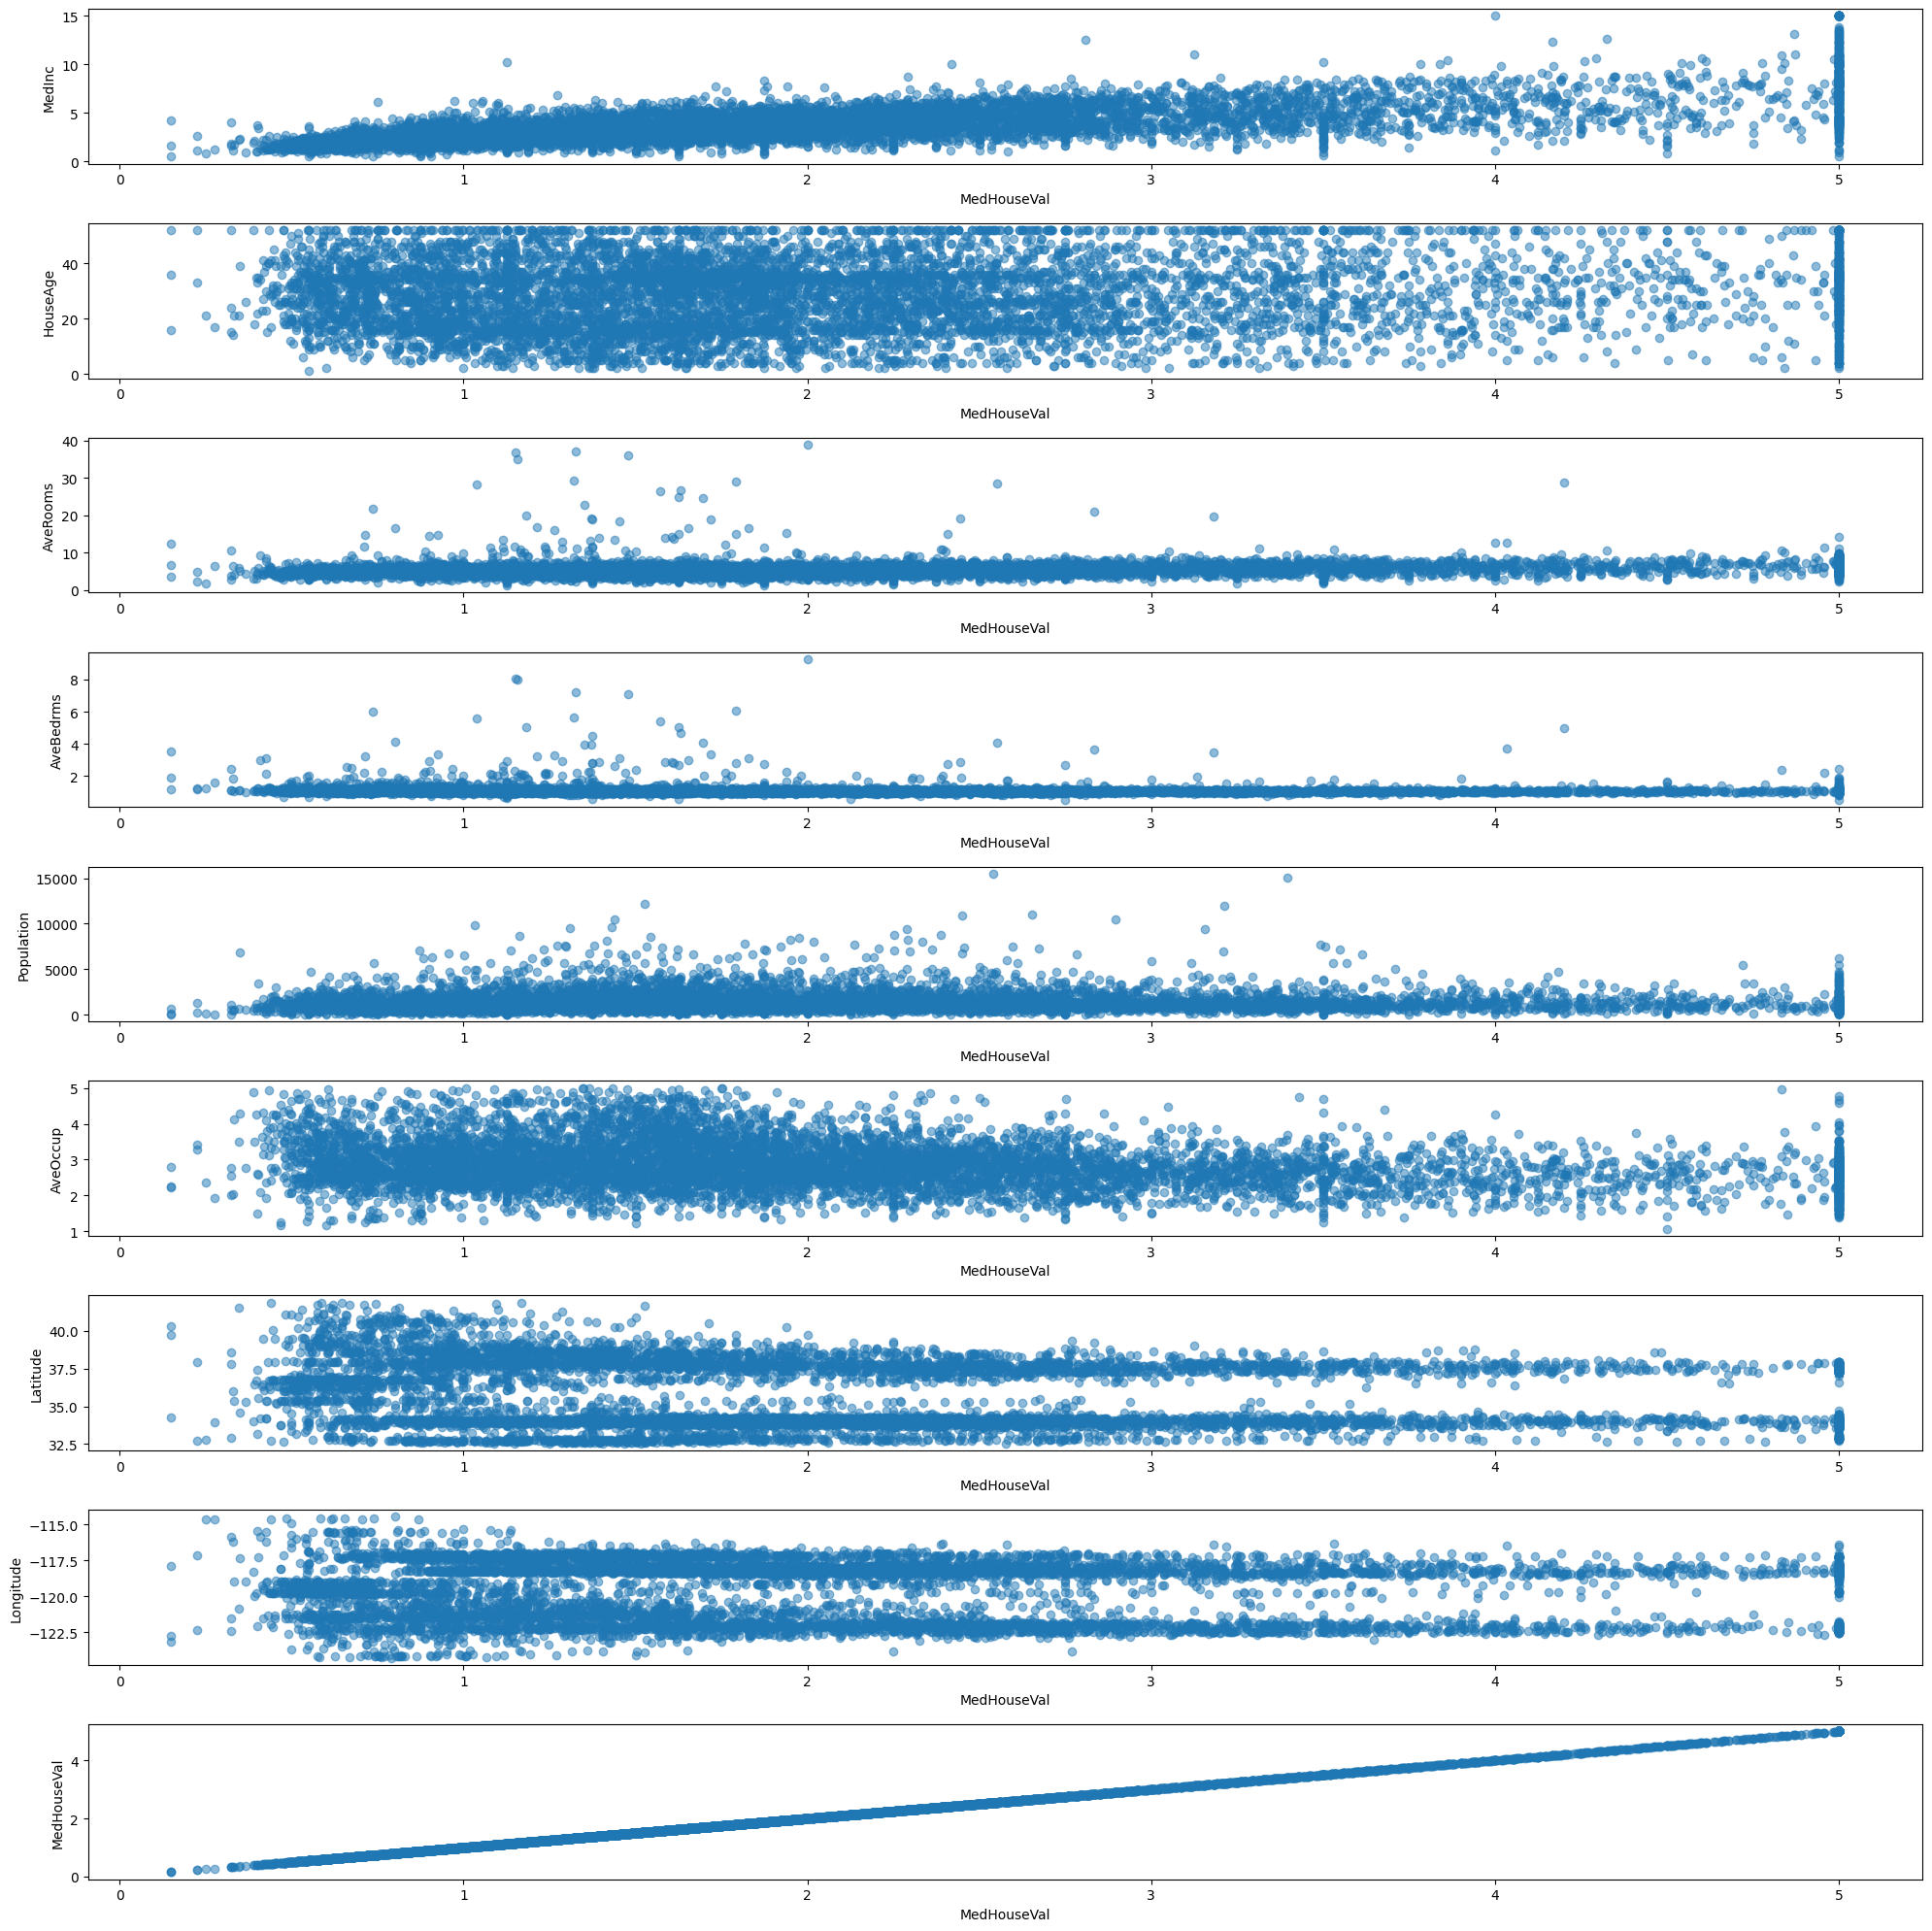

In [34]:
fig,axis = plt.subplots(9,1,figsize=(20,20))

for i in range(amostra.shape[1]):

            # Gráfico de dispersão para variáveis fora da diagonal
            axis[i].scatter(amostra.iloc[:, -1], amostra.iloc[:, i], alpha=0.5)
            axis[i].set_xlabel(amostra.columns[-1])
            axis[i].set_ylabel(amostra.columns[i])

# Ajustar o layout para que os subgráficos não se sobreponham
plt.tight_layout()
plt.show()

In [35]:
amostra = amostra[amostra['AveRooms']<= 10]
amostra = amostra[amostra['AveRooms']>=1]
amostra = amostra[amostra['AveBedrms']>=1]


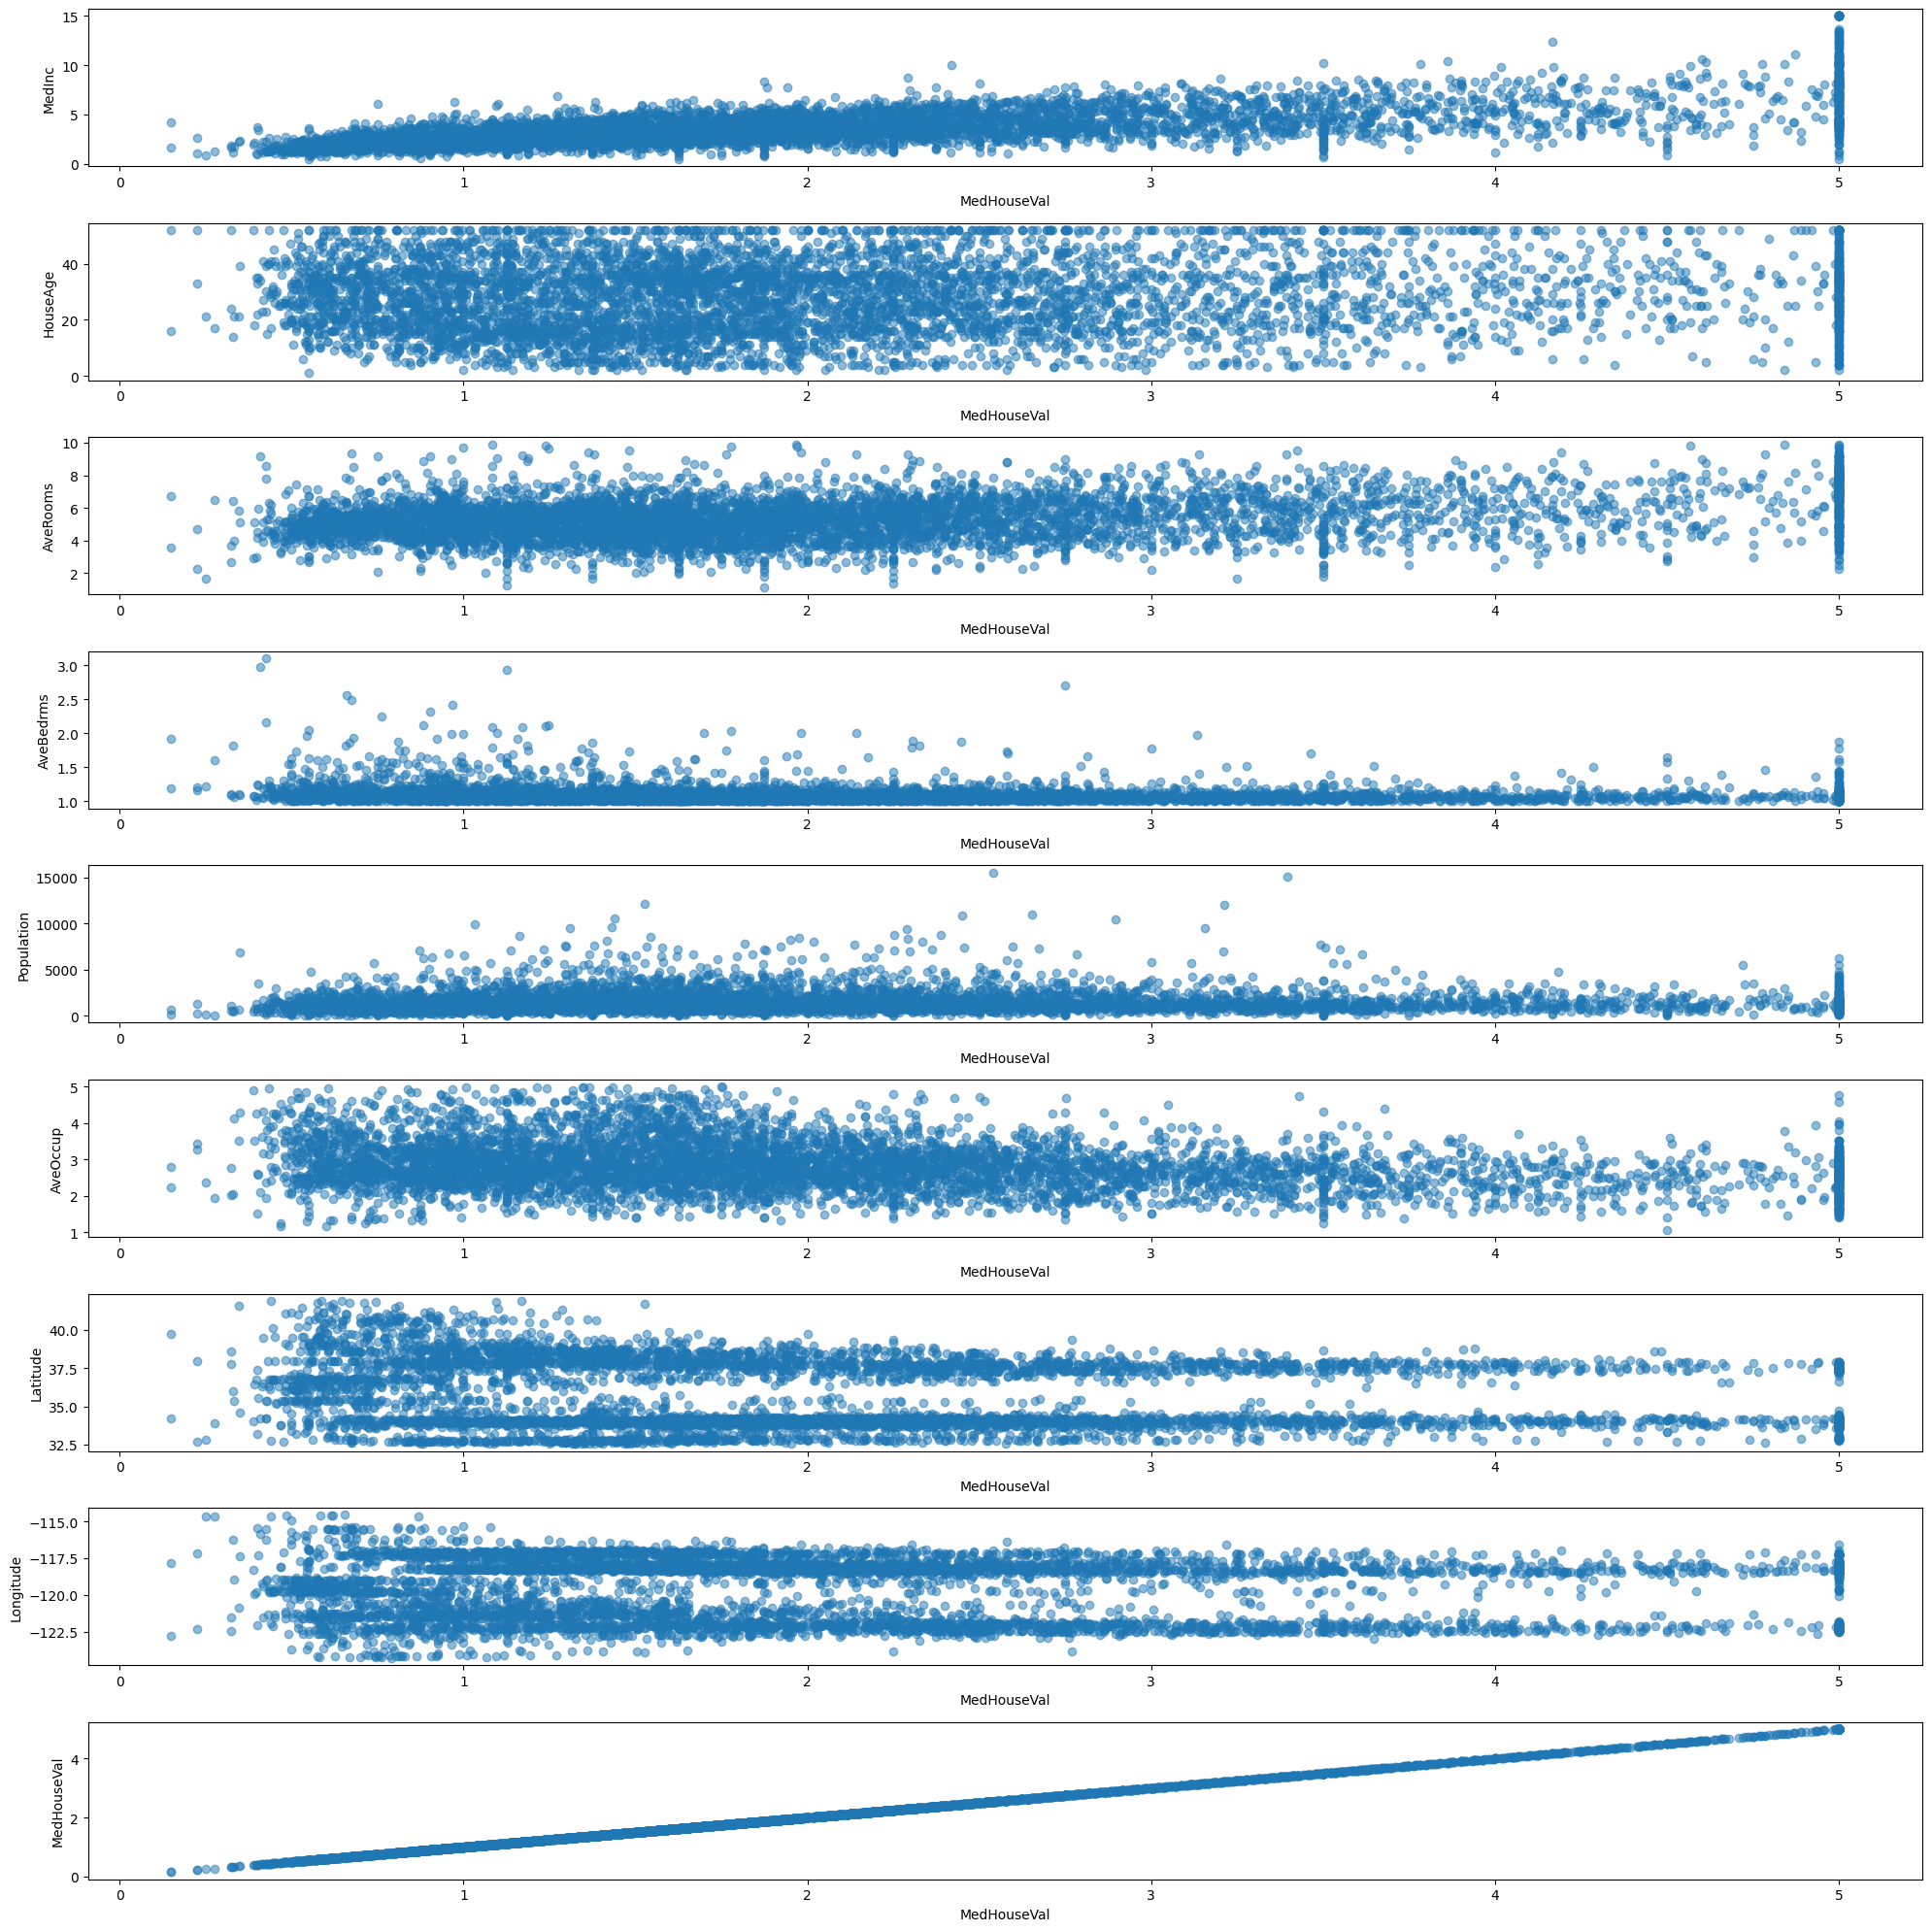

In [36]:
fig,axis = plt.subplots(9,1,figsize=(20,20))

for i in range(amostra.shape[1]):

            # Gráfico de dispersão para variáveis fora da diagonal
            axis[i].scatter(amostra.iloc[:, -1], amostra.iloc[:, i], alpha=0.5)
            axis[i].set_xlabel(amostra.columns[-1])
            axis[i].set_ylabel(amostra.columns[i])

# Ajustar o layout para que os subgráficos não se sobreponham
plt.tight_layout()
plt.show()

# Apos a análise, pode chegar na conclusão de que a quantidade de quartos e que a media familiar na região sao os fatores que possuem mais correlação com o valor da casa

Podemos calcular o coeficiente de correlação de Pearson para confirmar a teoria

In [37]:
correlacoes=[]
for i in range(amostra.shape[1] - 1):  # Exclui a última coluna da iteração
    correlacoes.append(amostra.iloc[:, i].corr(amostra.iloc[:, -1]))

In [38]:
correlacoes

[0.6902253158030603,
 0.10490757984121644,
 0.30898349490074806,
 -0.12653985349782973,
 -0.014046503462907253,
 -0.2741684841170784,
 -0.15617727368844975,
 -0.03482068364012039]

## com isso podemos chegar a conclusao de que a quantidade de quartos e a media familiar na regiao sao os fatores que mais influenciam de forma proporcional, de acordo com o coeficiente de pearson

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = amostra[['MedInc','AveRooms','AveOccup']]  # Variáveis independentes
y = amostra.iloc[:,-1]       # Variável dependente

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo de regressão linear
model = LinearRegression()

# Ajustar o modelo
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = model.score(X_test, y_test)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Coeficientes
print(f'Coeficiente: {model.coef_}')
print(f'Intercepto: {model.intercept_}')


Mean Squared Error: 0.5732936018979115
R^2 Score: 0.5516508749870306
Coeficiente: [ 0.53225375 -0.24731431 -0.39692973]
Intercepto: 2.5200460271862006


Pontos relevantes
* Por mais que a correlação de pearson tenha apontado uma relação linear positiva apesar de fraca, a medida do coeficiente aponta uma proporção inversa para o valor das casas e o numero de quartos
* Como apontado anteriormente, o valor medio de salário do morador é o que mais afeta o valor da casa
* Provavelmente com uma melhor preparação dos dados seja possivel um melhor ajuste de modelos
